In [11]:

import random as rd
import numpy as np

basis = ["+", "x"]
keysize = 10
values = [0, 1]
finalkey = [rd.choice(values) for i in range(keysize)]
sender_basis = [rd.choice(basis) for j in range(keysize)]
recv_basis = [rd.choice(basis) for k in range(keysize)]

print("Draft key: ", draftKey)
print("Alice's basis: ", sender_basis)
print("Bob's basis: ", recv_basis)

Draft key:  [0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
Alice's basis:  ['+', 'x', 'x', 'x', 'x', '+', 'x', '+', '+', 'x']
Bob's basis:  ['+', 'x', 'x', '+', 'x', '+', 'x', '+', '+', '+']


In [12]:
transmittion = []

def send():
    
    for i in range(keysize):
        if finalkey[i] == 1 and sender_basis[i] == "+":
            transmittion.append([0,1])
        elif finalkey[i] == 1 and sender_basis[i] == "x":
            transmittion.append([1,1])
        elif finalkey[i] == 0 and sender_basis[i] == "+":
            transmittion.append([1,0])
        elif finalkey[i] == 0 and sender_basis[i] == "x":
            transmittion.append([-1,1])
        
    print("Photons transmitted by polarization: ")
    print(transmittion)
    
send()

Photons transmitted by polarization: 
[[0, 1], [1, 1], [1, 1], [1, 1], [-1, 1], [1, 0], [1, 1], [1, 0], [1, 0], [1, 1]]


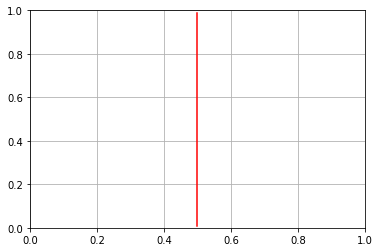

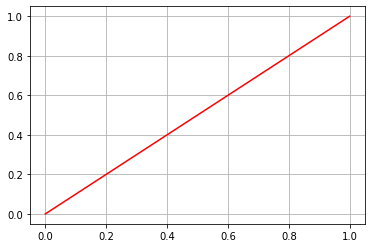

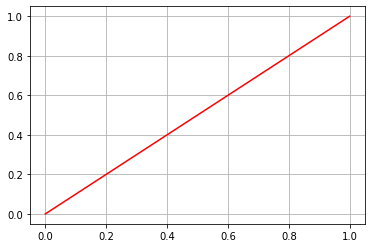

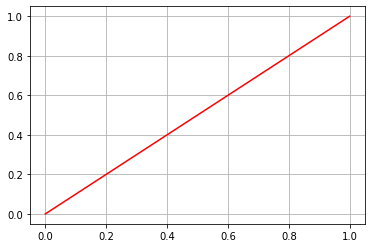

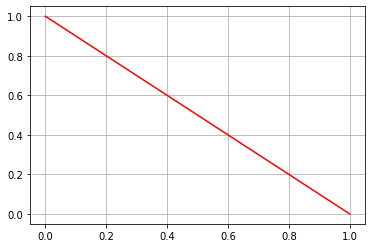

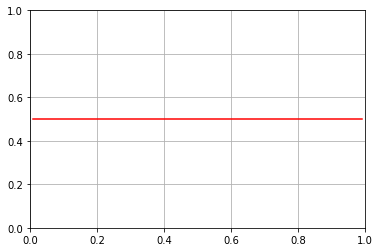

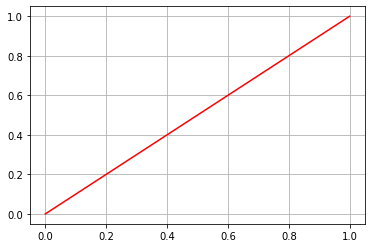

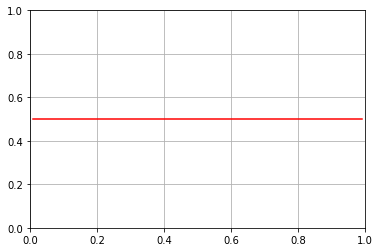

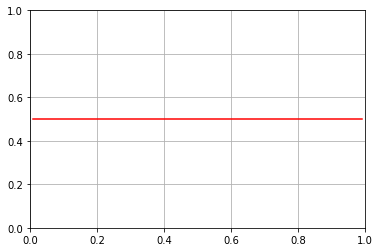

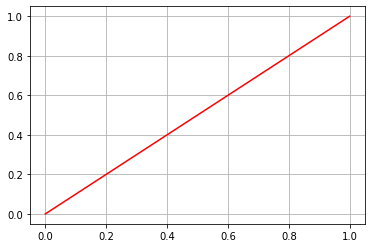

In [13]:
import matplotlib.pyplot as plt

def displaySend():

    for i in range(keysize):
        if transmittion[i] == [0,1]:
            plt.axvline(x=0.5, ymin=0.01, ymax=0.99, color='r')
            plt.grid()
            plt.show()
        elif transmittion[i] == [1,1]:
            x1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            y1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            plt.plot(x1, y1, color='r')
            plt.grid()
            plt.show()
        elif transmittion[i] == [1,0]:
            plt.axhline(y=0.5, xmin=0.01, xmax=0.99, color='r')
            plt.grid()
            plt.show()
        elif transmittion[i] == [-1,1]:
            x2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            y2 = list(reversed(x2))
            plt.plot(x2, y2, color='r')
            plt.grid()
            plt.show()

displaySend()

In [14]:
receivedKey = []

def receive():
    
    for i in range(keysize):
        if transmittion[i] == [0,1] and recv_basis[i] == "+":
            receivedKey.append(1)
        elif transmittion[i] == [0,1] and recv_basis[i] == "x":
            receivedKey.append("DISCARD")
        elif transmittion[i] == [1,1] and recv_basis[i] == "+":
            receivedKey.append("DISCARD")
        elif transmittion[i] == [1,1] and recv_basis[i] == "x":
            receivedKey.append(1)
        elif transmittion[i] == [1,0] and recv_basis[i] == "+":
            receivedKey.append(0)
        elif transmittion[i] == [1,0] and recv_basis[i] == "x":
            receivedKey.append("DISCARD")
        elif transmittion[i] == [-1,1] and recv_basis[i] == "+":
            receivedKey.append("DISCARD")
        elif transmittion[i] == [-1,1] and recv_basis[i] == "x":
            receivedKey.append(0)
    
    print("Received Key: ")
    print(receivedKey)
    
receive()


Received Key: 
[1, 1, 1, 'DISCARD', 0, 0, 1, 0, 0, 'DISCARD']


In [15]:
agreedKey = []

def keyAgreement():

    for i in range(draftKeySize):
        if receivedKey[i] == 1 or receivedKey[i] == 0:
            agreedKey.append(receivedKey[i])
            
    print("Agreed upon key: ")
    print(agreedKey)

keyAgreement()

Agreed upon key: 
[1, 1, 1, 0, 0, 1, 0, 0]
